In [364]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.feature_selection import SelectKBest

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn import metrics
import itertools

In [295]:
train = pd.read_csv('C:/Users/Admin/Desktop/Magistrale/Primo anno/Secondo semestre/DM2/UCI HAR Dataset/csv_files/train.csv')
test = pd.read_csv('C:/Users/Admin/Desktop/Magistrale/Primo anno/Secondo semestre/DM2/UCI HAR Dataset/csv_files/test.csv')

In [296]:
attributes = [col for col in train.columns if col != 'Activity']
attributes.pop()
X_train = train[attributes].values
X_test = test[attributes].values
y_train = train['ActivityName']
y_test = test['ActivityName']

# Confusion matrix

In [357]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Function to perform any model

In [360]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done....!\n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('==> training time:- {}\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done....!\n')
    results['testing_time'] = test_end_time - test_start_time
    print('==> testing time:- {}\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('==> Accuracy:- {}\n'.format(accuracy))
   
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('\n ********Confusion Matrix********')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(6,6))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('****************| Classifiction Report |****************')
    classification_report = metrics.classification_report(y_test, y_pred)
   
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results

# GridSearch

In [358]:


def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('\n\n==> Best Estimator:')
    print('\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('\n==> Best parameters:')
    print('\tParameters of best estimator : {}'.format(model.best_params_))


    #  number of cross validation splits
    print('\n==> No. of CrossValidation sets:')
    print('\tTotal numbre of cross validation sets: {}'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('\n==> Best Score:')
    print('\tAverage Cross Validate scores of best estimator : {}'.format(model.best_score_))

    



# Naive Bayes

In [230]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB

In [231]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [232]:
y_pred = clf.predict(X_test)

In [233]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7702748557855447
F1-score [0.74514286 0.64668483 0.82931189 0.83116883 0.70410959 0.84456929]
                    precision    recall  f1-score   support

            LAYING       0.96      0.61      0.75       537
           SITTING       0.58      0.73      0.65       491
          STANDING       0.79      0.87      0.83       532
           WALKING       0.82      0.84      0.83       496
WALKING_DOWNSTAIRS       0.83      0.61      0.70       420
  WALKING_UPSTAIRS       0.76      0.96      0.84       471

          accuracy                           0.77      2947
         macro avg       0.79      0.77      0.77      2947
      weighted avg       0.79      0.77      0.77      2947



In [234]:
sel = SelectKBest(k=185)
X_train_sel = sel.fit_transform(X_train, y_train)

X_train_sel.shape

(7352, 185)

In [235]:
X_test_sel = sel.transform(X_test)

clf = GaussianNB()
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8187987784187309
F1-score [0.99533147 0.72590738 0.81921824 0.79522863 0.70833333 0.81213307]
                    precision    recall  f1-score   support

            LAYING       1.00      0.99      1.00       537
           SITTING       0.94      0.59      0.73       491
          STANDING       0.72      0.95      0.82       532
           WALKING       0.78      0.81      0.80       496
WALKING_DOWNSTAIRS       0.78      0.65      0.71       420
  WALKING_UPSTAIRS       0.75      0.88      0.81       471

          accuracy                           0.82      2947
         macro avg       0.83      0.81      0.81      2947
      weighted avg       0.83      0.82      0.81      2947



In [236]:
X_train_cat = list()
for i in range(len(X_train)):
    X_train_cat.append(pd.qcut(X_train[i], q=[0.0, 0.25, 0.5, 0.75, 1.0], labels=False))
X_train_cat = np.array(X_train_cat)

In [237]:
X_test_cat = list()
for i in range(len(X_test)):
    X_test_cat.append(pd.qcut(X_test[i], q=[0.0, 0.25, 0.5, 0.75, 1.0], labels=False))
X_test_cat = np.array(X_test_cat)

In [238]:
clf = CategoricalNB()
clf.fit(X_train_cat, y_train)

CategoricalNB()

In [239]:
y_pred = clf.predict(X_test_cat)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8673227010519172
F1-score [0.97860465 0.78794403 0.83482944 0.87702574 0.80156658 0.89906348]
                    precision    recall  f1-score   support

            LAYING       0.98      0.98      0.98       537
           SITTING       0.84      0.75      0.79       491
          STANDING       0.80      0.87      0.83       532
           WALKING       0.83      0.93      0.88       496
WALKING_DOWNSTAIRS       0.89      0.73      0.80       420
  WALKING_UPSTAIRS       0.88      0.92      0.90       471

          accuracy                           0.87      2947
         macro avg       0.87      0.86      0.86      2947
      weighted avg       0.87      0.87      0.87      2947



In [240]:
sel = SelectKBest(k=185)
X_train_sel = sel.fit_transform(X_train_cat, y_train)

X_train_sel.shape

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [561] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


(7352, 185)

In [241]:
X_test_sel = sel.transform(X_test_cat)

clf = CategoricalNB()
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8391584662368511
F1-score [0.98886827 0.6937355  0.7860781  0.85768143 0.8030888  0.87633262]
                    precision    recall  f1-score   support

            LAYING       0.99      0.99      0.99       537
           SITTING       0.81      0.61      0.69       491
          STANDING       0.72      0.87      0.79       532
           WALKING       0.81      0.92      0.86       496
WALKING_DOWNSTAIRS       0.87      0.74      0.80       420
  WALKING_UPSTAIRS       0.88      0.87      0.88       471

          accuracy                           0.84      2947
         macro avg       0.84      0.83      0.83      2947
      weighted avg       0.84      0.84      0.84      2947



## Naive Bayes with GridSearch

training the model..
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Done....!

==> training time:- 0:00:48.311000

Predicting test data
Done....!

==> testing time:- 0:00:00.190000

==> Accuracy:- 0.825246012894469


 ********Confusion Matrix********

 [[536   0   0   0   0   1]
 [  1 250 238   0   0   2]
 [  0   1 530   0   0   1]
 [  0   0   0 450  23  23]
 [  0   0   0 131 215  74]
 [  0   0   0  14   6 451]]


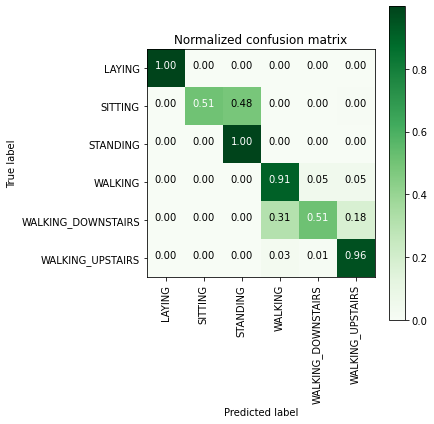

****************| Classifiction Report |****************
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       1.00      0.51      0.67       491
          STANDING       0.69      1.00      0.82       532
           WALKING       0.76      0.91      0.82       496
WALKING_DOWNSTAIRS       0.88      0.51      0.65       420
  WALKING_UPSTAIRS       0.82      0.96      0.88       471

          accuracy                           0.83      2947
         macro avg       0.86      0.81      0.81      2947
      weighted avg       0.86      0.83      0.81      2947



==> Best Estimator:
	GaussianNB(var_smoothing=0.0006579332246575676)


==> Best parameters:
	Parameters of best estimator : {'var_smoothing': 0.0006579332246575676}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 3

==> Best Score:
	Average Cross Validate scores of best estimator : 0.8161032148477506


In [443]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

# start Grid search
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
log_reg = GaussianNB()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

# Linear Regression

In [242]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [243]:
new_y_test = y_test.replace({"WALKING": 1, "WALKING_UPSTAIRS": 2, "WALKING_DOWNSTAIRS": 3, "LAYING": 6, "SITTING": 4, "STANDING": 5})
new_y_train = y_train.replace({"WALKING": 1, "WALKING_UPSTAIRS": 2, "WALKING_DOWNSTAIRS": 3, "LAYING": 6, "SITTING": 4, "STANDING": 5})
new_y_train

0       5
1       5
2       5
3       5
4       5
       ..
7347    2
7348    2
7349    2
7350    2
7351    2
Name: ActivityName, Length: 7352, dtype: int64

In [244]:
reg = LinearRegression()
reg.fit(X_train, new_y_train)

LinearRegression()

In [245]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-3.26234167e-01  8.87281104e-02 -7.09059003e-02  3.12445789e+00
  8.44237158e-01  1.17663073e-01  6.51451341e-01  8.69457302e-03
  4.81760055e-01  1.52458093e-01  1.56415352e-01  1.52412739e-01
  3.50877765e-01  4.28052908e-02  1.08155096e-01  3.21677536e+00
 -6.30577219e+05 -4.56495086e+05 -2.21225885e+05 -1.90035158e-01
  3.39269231e-01 -1.85462106e-01  8.13955478e-02 -1.20415673e-01
  5.36988260e-02  7.14976439e-01  2.93408325e-01 -4.93870101e-01
 -2.47364862e-01 -2.47248931e-01 -3.55895433e-01 -1.61826888e-01
 -1.21910005e-01  7.00328485e-01  4.95644705e-01 -2.65790153e-01
 -1.69485887e-01  3.56475704e-02  8.93920277e-02 -7.05563969e-02
 -1.20239576e+00  1.66440504e-02 -1.60723878e+00 -3.91490190e+00
  6.01117656e+00  6.33667783e+00 -2.49623121e-01 -5.96644613e+00
 -4.48113347e+00  3.03919799e+00 -4.21193842e-02 -3.76122568e+00
 -3.30818037e+00  3.40581813e-01  4.30058024e+00 -1.11706639e-01
  7.99190339e-01  2.39081478e+00  1.57649748e+00  1.40902270e+00
  7.64912

In [246]:
y_pred = reg.predict(X_test)

In [247]:
print('R2: %.3f' % r2_score(new_y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(new_y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(new_y_test, y_pred))

R2: 0.946
MSE: 0.163
MAE: 0.285


In [248]:
sel = SelectKBest(k=185)
X_train_sel = sel.fit_transform(X_train, new_y_train)

X_train_sel.shape

(7352, 185)

In [249]:
X_test_sel = sel.transform(X_test)

reg = LinearRegression()
reg.fit(X_train_sel, new_y_train)

LinearRegression()

In [250]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [ 8.58625446e+00 -1.40327488e+00  2.72843534e+00  8.67843814e-02
 -3.06628397e-01  6.72021849e-01  1.38653928e-01  1.63753110e-01
  2.44548163e-01  1.57739739e-01  6.70060217e-02  4.17675377e+00
 -8.09360023e-01 -4.12778374e-01  2.31884342e-01 -3.65235888e-02
 -1.68524105e-02 -6.27390609e-02  1.01293992e-01 -4.01120947e+00
 -2.15038343e-01  1.56272593e+00 -1.47168719e+00 -3.76566372e-01
 -1.16376138e+00  7.27611359e+00  7.29233197e+00  6.95716412e+00
  7.36906871e-01  7.34949509e-01  1.46976480e+00  1.85690283e-01
  2.08831910e-01  2.37037729e-01  1.10647015e-01  2.81652335e-01
  6.19313044e-02 -1.29004746e+00  1.64676962e-01 -2.64878854e-01
 -2.05392646e-01 -3.21198010e-01 -1.36489000e-01 -7.05432658e-01
  4.83457565e+00 -1.90120816e+00  6.27266676e+00 -6.21337356e-01
 -1.01844534e-01  1.38525354e+00  4.08021932e-02 -1.39152293e-01
 -1.00616410e-01 -7.05117436e-02  1.54416504e-01  1.38750778e-01
 -7.95756900e-02 -2.22105464e-01 -1.63903584e+00 -6.14143473e-01
  2.53969

In [251]:
y_pred = reg.predict(X_test_sel)

In [252]:
print('R2: %.3f' % r2_score(new_y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(new_y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(new_y_test, y_pred))

R2: 0.948
MSE: 0.158
MAE: 0.318


## Linear Regression in 2 dimensions

In [253]:
reg = LinearRegression()
reg.fit(X_train.T[0].reshape(-1, 1), X_train.T[1].reshape(-1, 1))
y_pred = reg.predict(X_test.T[0].reshape(-1, 1)).reshape(1,-1)[0]

print('R2: %.3f' % r2_score(new_y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(new_y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(new_y_test, y_pred))

R2: -4.270
MSE: 15.956
MAE: 3.596


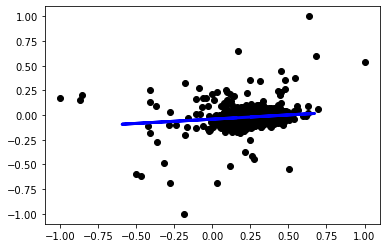

In [254]:
plt.scatter(X_train.T[0], X_train.T[1],  color='black')
plt.plot(X_test.T[0], y_pred, color='blue', linewidth=3, label='test')
plt.show()

In [255]:
sel = SelectKBest(k=185)
X_train_sel = sel.fit_transform(X_train, new_y_train)

X_train_sel.shape

(7352, 185)

In [256]:
X_test_sel = sel.transform(X_test)

reg = LinearRegression()
reg.fit(X_train_sel.T[0].reshape(-1, 1), X_train_sel.T[1].reshape(-1, 1))
y_pred = reg.predict(X_test_sel.T[0].reshape(-1, 1)).reshape(1,-1)[0]

print('R2: %.3f' % r2_score(new_y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(new_y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(new_y_test, y_pred))

R2: -5.976
MSE: 21.120
MAE: 4.097


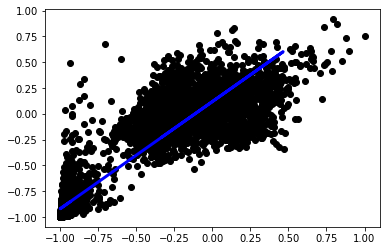

In [257]:
plt.scatter(X_train_sel.T[0], X_train_sel.T[1],  color='black')
plt.plot(X_test_sel.T[0], y_pred, color='blue', linewidth=3, label='test')
plt.show()

# Lasso

In [258]:
reg = Lasso()
reg.fit(X_train, new_y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-0.          0.          0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
  0.          0.          0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.         -0.          0.         -0.          0.
 -0.          0.          0.          0.         -0.          0.
 -0.          0.         -0.         -0.         -0.          0.
  0.          0.         -0.         -0.          0.         -0.
 -0.         -0.          0.          0.         -0.          0.
  0.          0.         -0.          0.          0.          0.
 -0.         -0.         -0.          0.          0.         -0.
 -0.          0.         -0.         -0.          0.         -0.
 -0.         -0.         -0.          0.         -0.         -0.
 -0.         -0.          0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.     

In [259]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(new_y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(new_y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(new_y_test, y_pred))

R2: 0.131
MSE: 2.631
MAE: 1.395


In [260]:
sel = SelectKBest(k=185)
X_train_sel = sel.fit_transform(X_train, new_y_train)

X_train_sel.shape

(7352, 185)

In [261]:
reg = Lasso()
reg.fit(X_train_sel, new_y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.          0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.         -0.          0.         -0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.          0.          0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.     

In [262]:
X_test_sel = sel.transform(X_test)
y_pred = reg.predict(X_test_sel)
print('R2: %.3f' % r2_score(new_y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(new_y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(new_y_test, y_pred))

R2: 0.131
MSE: 2.631
MAE: 1.395


# Ridge

In [263]:
reg = Ridge()
reg.fit(X_train, new_y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-2.28183505e-01  7.58554524e-02  1.07149729e-02  3.07107217e-01
 -7.11002527e-01 -3.91118939e-01  5.93198179e-01 -1.55632768e-01
  1.36745978e-01  2.61268177e-01  1.74392503e-01  1.30878595e-01
  2.93978274e-01  5.10091883e-02  1.13223308e-01  1.16481723e+00
  3.43153518e-01  3.09977687e-01  3.29298235e-01 -1.29246275e-01
  4.17897936e-01 -3.82261991e-02  3.02133334e-02 -1.15322134e-01
  5.23950846e-02  5.02530577e-01  1.26046386e-01 -2.49363762e-01
 -2.30467782e-02 -1.19403089e-01 -1.74456893e-01 -1.95538475e-01
 -1.64906461e-01  3.55623958e-01  1.43905378e-01 -2.28195975e-01
 -8.14158306e-02  5.13774665e-02  8.46202119e-02 -5.82141304e-02
 -4.11507448e-01 -6.36039495e-02 -3.88886602e-01 -1.87130244e-01
  4.13139825e-01  1.45388365e-01 -1.83480169e-01  1.77037003e-01
  7.86188058e-02 -3.70807255e-01  2.67439861e-01 -2.61380902e-02
 -4.27396202e-01 -2.91630229e-01  1.73473040e-02 -1.40303532e-01
  1.28803040e-01  1.53460249e+00  8.13474459e-01  7.13272756e-02
 -1.73725

In [264]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(new_y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(new_y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(new_y_test, y_pred))

R2: 0.948
MSE: 0.156
MAE: 0.285


In [265]:
sel = SelectKBest(k=185)
X_train_sel = sel.fit_transform(X_train, new_y_train)

X_train_sel.shape

(7352, 185)

In [266]:
reg = Ridge()
reg.fit(X_train_sel, new_y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [ 1.36603978e-01 -1.04810397e+00 -1.11052997e-01  2.14187167e-01
 -2.99726850e-01  3.12550228e-01  1.76369067e-01  2.08469453e-01
  2.54896762e-01  1.60313513e-01 -2.82232156e-02  1.58951920e+00
  4.98874258e-01 -4.33730659e-01  3.65490830e-01  1.63753043e-01
 -4.03510987e-02 -5.12878019e-02 -3.57055671e-01 -1.52475462e+00
 -1.01014894e-02  1.74572321e-01 -1.05954971e+00 -1.06862311e+00
 -1.07250598e+00  4.33390725e-01  1.94301381e-01  1.94659622e-01
  9.17653897e-02 -4.28407820e-02  2.65246795e-01  3.24403877e-01
  1.66074714e-01  2.62258317e-01  4.98441652e-02  2.93593847e-01
  1.20013218e-01  8.53983229e-02  1.16022455e-01 -3.29929166e-01
 -8.04536823e-02 -3.64687484e-01 -7.45094948e-02 -7.32713341e-01
  1.56581744e-01 -1.31551417e-01 -4.79690805e-01 -2.40565848e-01
 -1.68576415e-01  4.05229081e-01  2.07090579e-02 -1.23308689e-01
 -9.29533553e-03 -2.23472891e-01  1.87362693e-01  4.57391099e-01
 -5.84031037e-01 -3.33631604e-01 -8.38805754e-01 -5.04786513e-01
  2.78244

In [267]:
X_test_sel = sel.transform(X_test)

y_pred = reg.predict(X_test_sel)
print('R2: %.3f' % r2_score(new_y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(new_y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(new_y_test, y_pred))

R2: 0.948
MSE: 0.157
MAE: 0.318


## Ridge with GridSearch

In [460]:
model = Ridge()
# define evaluation
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]
# define search
search = GridSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=3)
# execute search
result = search.fit(X_test, new_y_test)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -0.3120776889875731
Best Hyperparameters: {'alpha': 1, 'fit_intercept': True, 'normalize': False, 'solver': 'sag'}


In [465]:
reg = Ridge(alpha = 1, fit_intercept = True, normalize = False, solver = 'sag')
reg.fit(X_train, new_y_train)

y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(new_y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(new_y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(new_y_test, y_pred))

R2: 0.948
MSE: 0.156
MAE: 0.287


# Logistic Regression

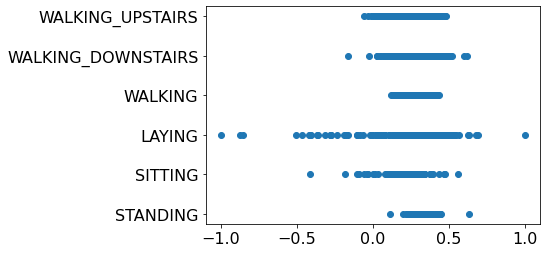

In [268]:
plt.scatter(X_train.T[0], y_train)
#plt.xlabel(selected_columns[0], fontsize=16)
#plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [269]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [346]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [347]:
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9521547336274178
F1-score [0.99906977 0.91239316 0.92863595 0.96039604 0.96543504 0.94498382]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.87      0.91       491
          STANDING       0.89      0.97      0.93       532
           WALKING       0.94      0.98      0.96       496
WALKING_DOWNSTAIRS       0.97      0.96      0.97       420
  WALKING_UPSTAIRS       0.96      0.93      0.94       471

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947



In [272]:
sel = SelectKBest(k=185)
X_train_sel = sel.fit_transform(X_train, new_y_train)

X_train_sel.shape

(7352, 185)

In [273]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train_sel, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [274]:
X_test_sel = sel.transform(X_test)
y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9338310145911096
F1-score [0.97421203 0.88577586 0.88441331 0.95274831 0.97613365 0.93791574]
                    precision    recall  f1-score   support

            LAYING       1.00      0.95      0.97       537
           SITTING       0.94      0.84      0.89       491
          STANDING       0.83      0.95      0.88       532
           WALKING       0.91      1.00      0.95       496
WALKING_DOWNSTAIRS       0.98      0.97      0.98       420
  WALKING_UPSTAIRS       0.98      0.90      0.94       471

          accuracy                           0.93      2947
         macro avg       0.94      0.93      0.94      2947
      weighted avg       0.94      0.93      0.93      2947



In [343]:
from sklearn import linear_model

In [349]:
cli = [1,0.5,0.1,0.01,0.003,0.0003]
trainacc = np.array([])
testacc = np.array([])
for j in cli:         #iterating through different penalty values
    LRmod = linear_model.LogisticRegression(penalty='l2', C=j)
    LRmod.fit(X_train,y_train)
    pred = LRmod.predict(X_test)
    pred1 = LRmod.predict(X_train)
    testac = accuracy_score(y_true = y_test, y_pred = pred)
    trainac = accuracy_score(y_true = y_train, y_pred = pred1)
    trainacc = np.append(trainacc,trainac)
    testacc = np.append(testacc,testac)
    print("Training Accuracy for penalty {}: {}".format(j,trainac))
    print("Testing Accuracy for penalty {}: {}".format(j,testac))

print("\n========================================================\n")
val = np.subtract(trainacc,testacc)    #finding the least difference between training and testing accuracy
print("Optimum Penalty value: {}".format(cli[np.argmin(val)]))
print("Maximum Testing Accuracy: {}".format(testacc[np.argmin(val)]))
print("Maximum Training Accuracy: {}".format(trainacc[np.argmin(val)]))



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy for penalty 1: 0.9884385201305768
Testing Accuracy for penalty 1: 0.9521547336274178


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy for penalty 0.5: 0.9862622415669206
Testing Accuracy for penalty 0.5: 0.9521547336274178


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy for penalty 0.1: 0.9816376496191512
Testing Accuracy for penalty 0.1: 0.9541907024092298


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy for penalty 0.01: 0.9623231773667029
Testing Accuracy for penalty 0.01: 0.9474041398031897


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy for penalty 0.003: 0.9349836779107725
Testing Accuracy for penalty 0.003: 0.9280624363759755
Training Accuracy for penalty 0.0003: 0.8822089227421109
Testing Accuracy for penalty 0.0003: 0.8618934509670851


Optimum Penalty value: 0.003
Maximum Testing Accuracy: 0.9280624363759755
Maximum Training Accuracy: 0.9349836779107725


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Logistic Regression with GridSearch

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Done....!

==> training time:- 0:00:17.961000

Predicting test data
Done....!

==> testing time:- 0:00:00.006000

==> Accuracy:- 0.9541907024092298


 ********Confusion Matrix********

 [[537   0   0   0   0   0]
 [  0 430  58   0   0   3]
 [  0  21 511   0   0   0]
 [  0   0   0 492   4   0]
 [  0   0   0   6 396  18]
 [  0   0   1  20   4 446]]


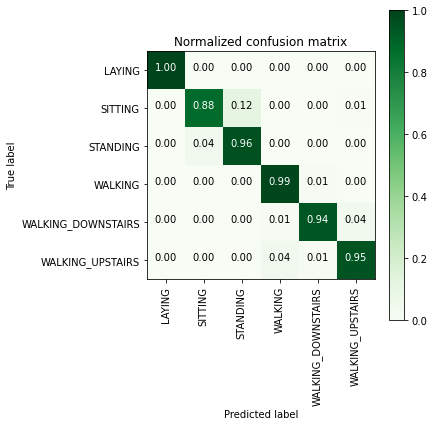

****************| Classifiction Report |****************
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.95      0.88      0.91       491
          STANDING       0.90      0.96      0.93       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       0.98      0.94      0.96       420
  WALKING_UPSTAIRS       0.96      0.95      0.95       471

          accuracy                           0.95      2947
         macro avg       0.96      0.95      0.95      2947
      weighted avg       0.96      0.95      0.95      2947



==> Best Estimator:
	LogisticRegression(C=0.1)


==> Best parameters:
	Parameters of best estimator : {'C': 0.1, 'penalty': 'l2'}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 3

==> Best Score:
	Average Cross Validate scores of best estimator : 0.9047901037199866


In [365]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

# Linear SVM

In [275]:
from sklearn.svm import LinearSVC

In [276]:
clf = LinearSVC(C=0.01, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9613165931455717
F1-score [1.         0.91817216 0.93090909 0.97244094 0.98067633 0.96684492]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.88      0.92       491
          STANDING       0.90      0.96      0.93       532
           WALKING       0.95      1.00      0.97       496
WALKING_DOWNSTAIRS       1.00      0.97      0.98       420
  WALKING_UPSTAIRS       0.97      0.96      0.97       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [277]:
sel = SelectKBest(k=185)
X_train_sel = sel.fit_transform(X_train, new_y_train)

X_train_sel.shape

(7352, 185)

In [278]:
clf = LinearSVC(C=0.01, random_state=42)
clf.fit(X_train_sel, y_train)

X_test_sel = sel.transform(X_test)
y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9311163895486936
F1-score [0.98199052 0.85491071 0.87285223 0.96015549 0.97460701 0.94907909]
                    precision    recall  f1-score   support

            LAYING       1.00      0.96      0.98       537
           SITTING       0.95      0.78      0.85       491
          STANDING       0.80      0.95      0.87       532
           WALKING       0.93      1.00      0.96       496
WALKING_DOWNSTAIRS       0.99      0.96      0.97       420
  WALKING_UPSTAIRS       0.97      0.93      0.95       471

          accuracy                           0.93      2947
         macro avg       0.94      0.93      0.93      2947
      weighted avg       0.94      0.93      0.93      2947



## Linear SVM with GridSearch

training the model..
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Done....!

==> training time:- 0:02:07.048000

Predicting test data
Done....!

==> testing time:- 0:00:00.008000

==> Accuracy:- 0.9626739056667798


 ********Confusion Matrix********

 [[537   0   0   0   0   0]
 [  1 428  58   0   0   4]
 [  0  12 518   2   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   3 411   6]
 [  0   0   0  24   0 447]]


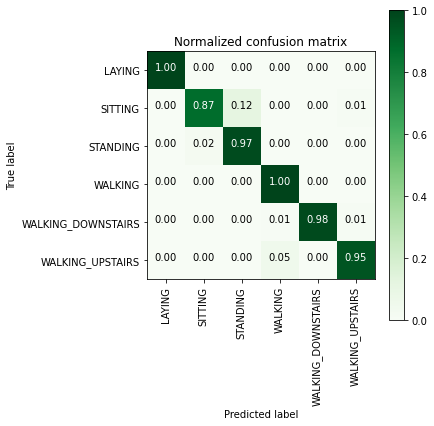

****************| Classifiction Report |****************
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.87      0.92       491
          STANDING       0.90      0.97      0.94       532
           WALKING       0.94      1.00      0.97       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.95      0.96       471

          accuracy                           0.96      2947
         macro avg       0.97      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



==> Best Estimator:
	LinearSVC(C=0.125, tol=5e-05)


==> Best parameters:
	Parameters of best estimator : {'C': 0.125}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of best estimator : 0.941248444993225


In [366]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_grid_search_attributes(lr_svc_grid_results['model'])

# Nonlinear SVM

In [279]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [280]:
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9307770614183916
F1-score [1.         0.87983281 0.89604416 0.94455067 0.91560102 0.94092827]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.90      0.86      0.88       491
          STANDING       0.88      0.92      0.90       532
           WALKING       0.90      1.00      0.94       496
WALKING_DOWNSTAIRS       0.99      0.85      0.92       420
  WALKING_UPSTAIRS       0.94      0.95      0.94       471

          accuracy                           0.93      2947
         macro avg       0.93      0.93      0.93      2947
      weighted avg       0.93      0.93      0.93      2947



In [281]:
sel = SelectKBest(k=185)
X_train_sel = sel.fit_transform(X_train, new_y_train)

X_train_sel.shape

(7352, 185)

In [282]:
clf = SVC(gamma='auto')
clf.fit(X_train_sel, y_train)

X_test_sel = sel.transform(X_test)
y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9080420766881574
F1-score [1.         0.78537736 0.84949833 0.94879227 0.93198992 0.92291447]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.93      0.68      0.79       491
          STANDING       0.77      0.95      0.85       532
           WALKING       0.91      0.99      0.95       496
WALKING_DOWNSTAIRS       0.99      0.88      0.93       420
  WALKING_UPSTAIRS       0.92      0.93      0.92       471

          accuracy                           0.91      2947
         macro avg       0.92      0.91      0.91      2947
      weighted avg       0.92      0.91      0.91      2947



In [283]:
clf = SVC(gamma='auto', C=0.1, kernel='rbf', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.843909060061079
F1-score [1.         0.63724138 0.80212282 0.86849073 0.77761836 0.90274841]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.99      0.47      0.64       491
          STANDING       0.67      0.99      0.80       532
           WALKING       0.77      0.99      0.87       496
WALKING_DOWNSTAIRS       0.98      0.65      0.78       420
  WALKING_UPSTAIRS       0.90      0.91      0.90       471

          accuracy                           0.84      2947
         macro avg       0.88      0.83      0.83      2947
      weighted avg       0.88      0.84      0.83      2947



## Kernel SVM with GridSearch

training the model..
Done....!

==> training time:- 0:14:19.115000

Predicting test data
Done....!

==> testing time:- 0:00:03.905000

==> Accuracy:- 0.9317950458092976


 ********Confusion Matrix********

 [[537   0   0   0   0   0]
 [  0 426  65   0   0   0]
 [  0  29 503   0   0   0]
 [  0   0   0 488   8   0]
 [  0   0   0  28 365  27]
 [  0   0   0  40   4 427]]


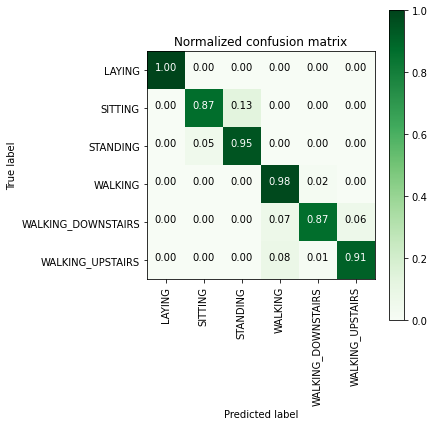

****************| Classifiction Report |****************
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.94      0.87      0.90       491
          STANDING       0.89      0.95      0.91       532
           WALKING       0.88      0.98      0.93       496
WALKING_DOWNSTAIRS       0.97      0.87      0.92       420
  WALKING_UPSTAIRS       0.94      0.91      0.92       471

          accuracy                           0.93      2947
         macro avg       0.93      0.93      0.93      2947
      weighted avg       0.93      0.93      0.93      2947



==> Best Estimator:
	SVC(C=2, gamma=0.0078125)


==> Best parameters:
	Parameters of best estimator : {'C': 2, 'gamma': 0.0078125}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of best estimator : 0.8478207707284138


In [367]:
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_grid_search_attributes(rbf_svm_grid_results['model'])

# Multilayer Perceptron

In [284]:
from sklearn.neural_network import MLPClassifier

In [285]:
hidden_layer_sizes = (100, 200,)

In [286]:
clf = MLPClassifier(random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9491007804546997
F1-score [0.98583569 0.91675676 0.91968226 0.95914397 0.97218863 0.94360087]
                    precision    recall  f1-score   support

            LAYING       1.00      0.97      0.99       537
           SITTING       0.98      0.86      0.92       491
          STANDING       0.87      0.98      0.92       532
           WALKING       0.93      0.99      0.96       496
WALKING_DOWNSTAIRS       0.99      0.96      0.97       420
  WALKING_UPSTAIRS       0.96      0.92      0.94       471

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947



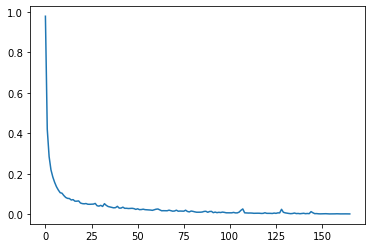

In [287]:
plt.plot(clf.loss_curve_)
plt.show()

In [288]:
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), alpha=0.1, learning_rate='adaptive', 
                    activation='tanh', early_stopping=False, momentum=0.9, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9541907024092298
F1-score [0.98870056 0.91578947 0.91945701 0.97148476 0.97073171 0.96170213]
                    precision    recall  f1-score   support

            LAYING       1.00      0.98      0.99       537
           SITTING       0.95      0.89      0.92       491
          STANDING       0.89      0.95      0.92       532
           WALKING       0.95      1.00      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.96      0.96      0.96       471

          accuracy                           0.95      2947
         macro avg       0.96      0.95      0.95      2947
      weighted avg       0.96      0.95      0.95      2947



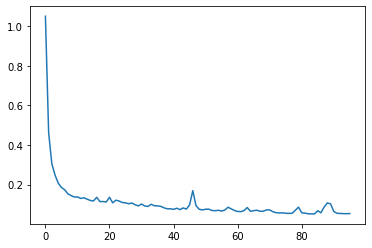

In [289]:
plt.plot(clf.loss_curve_)
plt.show()

## Multilayer Perceptron with GridSearch

training the model..
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Done....!

==> training time:- 0:25:55.573000

Predicting test data
Done....!

==> testing time:- 0:00:00.012000

==> Accuracy:- 0.9423142178486597


 ********Confusion Matrix********

 [[520   0  17   0   0   0]
 [  0 452  37   0   0   2]
 [  0  39 492   1   0   0]
 [  0   0   0 493   2   1]
 [  0   0   0   9 389  22]
 [  0   0   0  40   0 431]]


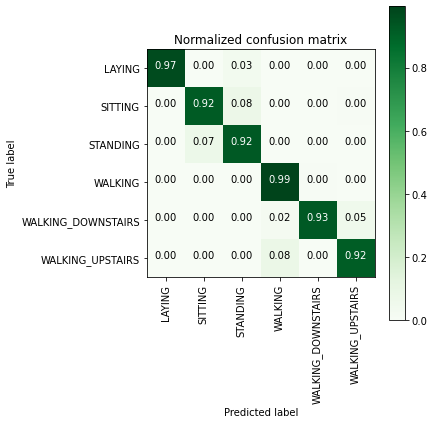

****************| Classifiction Report |****************
                    precision    recall  f1-score   support

            LAYING       1.00      0.97      0.98       537
           SITTING       0.92      0.92      0.92       491
          STANDING       0.90      0.92      0.91       532
           WALKING       0.91      0.99      0.95       496
WALKING_DOWNSTAIRS       0.99      0.93      0.96       420
  WALKING_UPSTAIRS       0.95      0.92      0.93       471

          accuracy                           0.94      2947
         macro avg       0.94      0.94      0.94      2947
      weighted avg       0.94      0.94      0.94      2947



==> Best Estimator:
	MLPClassifier(learning_rate='adaptive')


==> Best parameters:
	Parameters of best estimator : {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 3

==> Best Score:
	Average Cro

In [466]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

# start Grid search
parameters = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
log_reg = MLPClassifier()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

# Keras Deep Neural Networks

In [371]:
# use old pc or fix

from keras import backend as K
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout
from keras.layers import BatchNormalization
from keras.regularizers import L1L2

In [384]:
def build_model():
    
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [386]:
new_y_test = y_test.replace({"WALKING": 1, "WALKING_UPSTAIRS": 1, "WALKING_DOWNSTAIRS": 1, "LAYING": 0, "SITTING": 0, "STANDING": 0})
new_y_train = y_train.replace({"WALKING": 1, "WALKING_UPSTAIRS": 1, "WALKING_DOWNSTAIRS": 1, "LAYING": 0, "SITTING": 0, "STANDING": 0})

model1 = build_model()

history1 = model1.fit(X_train, new_y_train, epochs=50, batch_size=10).history

Epoch 1/50
736/736 [==============================] - 2s 2ms/step - loss: 0.0117 - accuracy: 0.9970
Epoch 2/50
736/736 [==============================] - 1s 2ms/step - loss: 8.3098e-04 - accuracy: 0.9993
Epoch 3/50
736/736 [==============================] - 1s 2ms/step - loss: 6.7637e-05 - accuracy: 1.0000
Epoch 4/50
736/736 [==============================] - 1s 2ms/step - loss: 3.7088e-05 - accuracy: 1.0000
Epoch 5/50
736/736 [==============================] - 1s 2ms/step - loss: 5.6173e-06 - accuracy: 1.0000
Epoch 6/50
736/736 [==============================] - 1s 2ms/step - loss: 5.7230e-06 - accuracy: 1.0000
Epoch 7/50
736/736 [==============================] - 2s 2ms/step - loss: 1.1970e-05 - accuracy: 1.0000
Epoch 8/50
736/736 [==============================] - 1s 2ms/step - loss: 1.6214e-06 - accuracy: 1.0000
Epoch 9/50
736/736 [==============================] - 1s 2ms/step - loss: 9.9039e-07 - accuracy: 1.0000
Epoch 10/50
736/736 [==============================] - 1s 2ms/step -

In [387]:
model2 = build_model()

history2 = model2.fit(X_train, new_y_train, epochs=50, batch_size=50).history

Epoch 1/50
148/148 [==============================] - 0s 2ms/step - loss: 0.0237 - accuracy: 0.9905
Epoch 2/50
148/148 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 0.9997
Epoch 3/50
148/148 [==============================] - 0s 2ms/step - loss: 1.5598e-04 - accuracy: 1.0000
Epoch 4/50
148/148 [==============================] - 0s 2ms/step - loss: 1.0954e-04 - accuracy: 1.0000
Epoch 5/50
148/148 [==============================] - 0s 3ms/step - loss: 4.4548e-05 - accuracy: 1.0000
Epoch 6/50
148/148 [==============================] - 0s 3ms/step - loss: 3.9203e-05 - accuracy: 1.0000
Epoch 7/50
148/148 [==============================] - 0s 3ms/step - loss: 2.6154e-05 - accuracy: 1.0000
Epoch 8/50
148/148 [==============================] - 0s 2ms/step - loss: 2.1742e-05 - accuracy: 1.0000
Epoch 9/50
148/148 [==============================] - 0s 3ms/step - loss: 1.7167e-05 - accuracy: 1.0000
Epoch 10/50
148/148 [==============================] - 0s 3ms/step - los

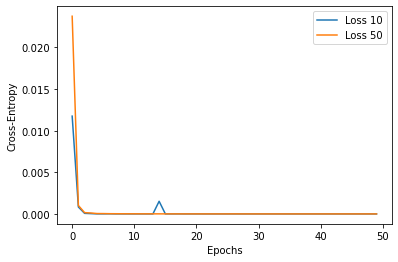

In [388]:
plt.plot(history1['loss'], label='Loss 10')
plt.plot(history2['loss'], label='Loss 50')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

In [389]:
test_loss_1, test_acc_1 = model1.evaluate(X_test, new_y_test)
test_loss_2, test_acc_2 = model2.evaluate(X_test, new_y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))

93/93 [==============================] - 0s 1ms/step - loss: 1.7989e-05 - accuracy: 1.0000
Loss 0.000001, Accuracy 1.000000
Loss 0.000018, Accuracy 1.000000


In [390]:
y_pred = model1.predict(X_test).astype(int)

print('Accuracy %s' % accuracy_score(new_y_test, y_pred))
print('F1-score %s' % f1_score(new_y_test, y_pred, average=None))
print(classification_report(new_y_test, y_pred))

Accuracy 0.999660671869698
F1-score [0.99967959 0.99963938]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1560
           1       1.00      1.00      1.00      1387

    accuracy                           1.00      2947
   macro avg       1.00      1.00      1.00      2947
weighted avg       1.00      1.00      1.00      2947



In [392]:
model3 = build_model()

history3 = model3.fit(X_train, new_y_train, validation_data=(X_test, new_y_test), epochs=100, batch_size=10).history

Epoch 1/100
736/736 [==============================] - 2s 2ms/step - loss: 0.0098 - accuracy: 0.9961 - val_loss: 4.2419e-04 - val_accuracy: 1.0000
Epoch 2/100
736/736 [==============================] - 2s 2ms/step - loss: 4.3306e-04 - accuracy: 1.0000 - val_loss: 9.6353e-05 - val_accuracy: 1.0000
Epoch 3/100
736/736 [==============================] - 2s 3ms/step - loss: 0.0019 - accuracy: 0.9997 - val_loss: 2.6993e-04 - val_accuracy: 1.0000
Epoch 4/100
736/736 [==============================] - 2s 3ms/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 1.5238e-04 - val_accuracy: 1.0000
Epoch 5/100
736/736 [==============================] - 2s 3ms/step - loss: 1.6199e-05 - accuracy: 1.0000 - val_loss: 5.8962e-05 - val_accuracy: 1.0000
Epoch 6/100
736/736 [==============================] - 2s 3ms/step - loss: 7.7842e-06 - accuracy: 1.0000 - val_loss: 4.5400e-05 - val_accuracy: 1.0000
Epoch 7/100
736/736 [==============================] - 2s 2ms/step - loss: 3.5256e-06 - accuracy: 1.0000 -

In [393]:
test_loss_3, test_acc_3 = model3.evaluate(X_test, new_y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))
print('Loss %f, Accuracy %f' % (test_loss_3, test_acc_3))

93/93 [==============================] - 0s 1ms/step - loss: 2.7799e-08 - accuracy: 1.0000
Loss 0.000001, Accuracy 1.000000
Loss 0.000018, Accuracy 1.000000
Loss 0.000000, Accuracy 1.000000


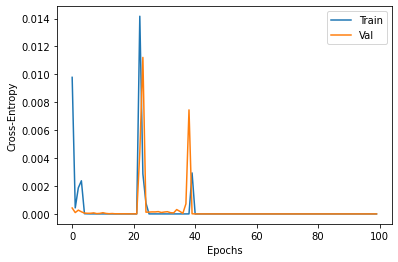

In [394]:
plt.plot(history3['loss'], label='Train')
plt.plot(history3['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

## Early Stopping

In [412]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split, cross_val_score 

In [415]:
new_y_test = y_test.replace({"WALKING": 1, "WALKING_UPSTAIRS": 1, "WALKING_DOWNSTAIRS": 1, "LAYING": 0, "SITTING": 0, "STANDING": 0})
new_y_train = y_train.replace({"WALKING": 1, "WALKING_UPSTAIRS": 1, "WALKING_DOWNSTAIRS": 1, "LAYING": 0, "SITTING": 0, "STANDING": 0})


In [416]:
X_X_train, X_val, y_y_train, y_val = train_test_split(X_train, new_y_train, test_size=0.2)

In [419]:
es = EarlyStopping(monitor='val_loss', patience=10)
mc = ModelCheckpoint('best_model_NOREG.h5', monitor='val_loss', save_best_only=True)

model4 = build_model()
history4 = model4.fit(X_X_train, y_y_train, validation_data=(X_val, y_val), epochs=50, 
                      batch_size=10, callbacks=[es,mc]).history

Epoch 1/50
589/589 [==============================] - 1s 2ms/step - loss: 0.0122 - accuracy: 0.9957 - val_loss: 5.9608e-04 - val_accuracy: 0.9993
Epoch 2/50
589/589 [==============================] - 1s 2ms/step - loss: 4.3463e-04 - accuracy: 0.9998 - val_loss: 0.0022 - val_accuracy: 0.9986
Epoch 3/50
589/589 [==============================] - 1s 2ms/step - loss: 3.0475e-05 - accuracy: 1.0000 - val_loss: 4.7219e-05 - val_accuracy: 1.0000
Epoch 4/50
589/589 [==============================] - 1s 2ms/step - loss: 9.2702e-06 - accuracy: 1.0000 - val_loss: 2.8451e-05 - val_accuracy: 1.0000
Epoch 5/50
589/589 [==============================] - 1s 2ms/step - loss: 1.0469e-05 - accuracy: 1.0000 - val_loss: 4.3837e-05 - val_accuracy: 1.0000
Epoch 6/50
589/589 [==============================] - 1s 2ms/step - loss: 8.2708e-06 - accuracy: 1.0000 - val_loss: 3.1289e-04 - val_accuracy: 1.0000
Epoch 7/50
589/589 [==============================] - 1s 2ms/step - loss: 0.0133 - accuracy: 0.9971 - val_lo

In [420]:
test_loss_4, test_acc_4 = model4.evaluate(X_test, new_y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))
#print('Loss %f, Accuracy %f' % (test_loss_3, test_acc_3))
print('Loss %f, Accuracy %f' % (test_loss_4, test_acc_4))

93/93 [==============================] - 0s 2ms/step - loss: 3.0253e-07 - accuracy: 1.0000
Loss 0.000001, Accuracy 1.000000
Loss 0.000018, Accuracy 1.000000
Loss 0.000000, Accuracy 1.000000


## L2 Regularization

In [421]:
from keras.regularizers import l2

def build_L2_model():
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    h_dim=100
    model.add(Dense(h_dim, activation='relu', input_shape=(n_feature,), kernel_regularizer=l2(0.01)))
    model.add(Dense(h_dim, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(h_dim, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(h_dim, activation='relu', kernel_regularizer=l2(0.01)))
    #linear activation
    model.add(Dense(1))

    #compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [423]:
mc = ModelCheckpoint('best_model_L2.h5', monitor='val_loss', save_best_only=True)

L2_model = build_L2_model()
h_L2 = L2_model.fit(X_train, new_y_train, validation_data=(X_val, y_val), epochs=50, 
                    batch_size=10, callbacks=[es,mc]).history

Epoch 1/50
736/736 [==============================] - 2s 3ms/step - loss: 1.4400 - accuracy: 0.9924 - val_loss: 0.4838 - val_accuracy: 0.9993
Epoch 2/50
736/736 [==============================] - 2s 3ms/step - loss: 0.2562 - accuracy: 0.9990 - val_loss: 0.1603 - val_accuracy: 0.9912
Epoch 3/50
736/736 [==============================] - 2s 2ms/step - loss: 0.0771 - accuracy: 0.9989 - val_loss: 0.0451 - val_accuracy: 0.9993
Epoch 4/50
736/736 [==============================] - 2s 2ms/step - loss: 0.0440 - accuracy: 0.9986 - val_loss: 0.0241 - val_accuracy: 0.9986
Epoch 5/50
736/736 [==============================] - 2s 2ms/step - loss: 0.0329 - accuracy: 0.9984 - val_loss: 0.0524 - val_accuracy: 0.9939
Epoch 6/50
736/736 [==============================] - 2s 3ms/step - loss: 0.0271 - accuracy: 0.9982 - val_loss: 0.0198 - val_accuracy: 0.9986
Epoch 7/50
736/736 [==============================] - 2s 3ms/step - loss: 0.0340 - accuracy: 0.9982 - val_loss: 0.0165 - val_accuracy: 1.0000
Epoch 

In [424]:
from keras.layers import Dropout

def build_DROPOUT_model():
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    h_dim=100
    model.add(Dense(h_dim, activation='relu', input_shape=(n_feature,)))
    model.add(Dropout(0.2))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(h_dim, activation='relu'))
    #linear activation
    model.add(Dense(1))

    #compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [425]:
mc = ModelCheckpoint('best_model_DROPOUT.h5', monitor='val_loss', save_best_only=True)

DROPOUT_model = build_DROPOUT_model()
h_DROPOUT = DROPOUT_model.fit(X_train, new_y_train, validation_data=(X_val, y_val), 
                              epochs=50, batch_size=10, callbacks=[es,mc]).history

Epoch 1/50
736/736 [==============================] - 2s 2ms/step - loss: 0.3482 - accuracy: 0.9608 - val_loss: 9.2854e-05 - val_accuracy: 1.0000
Epoch 2/50
736/736 [==============================] - 1s 2ms/step - loss: 0.0365 - accuracy: 0.9961 - val_loss: 1.6296e-04 - val_accuracy: 1.0000
Epoch 3/50
736/736 [==============================] - 1s 2ms/step - loss: 0.0103 - accuracy: 0.9982 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/50
736/736 [==============================] - 1s 2ms/step - loss: 7.0843e-04 - accuracy: 0.9996 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/50
736/736 [==============================] - 1s 2ms/step - loss: 0.0049 - accuracy: 0.9992 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/50
736/736 [==============================] - 1s 2ms/step - loss: 0.1561 - accuracy: 0.9880 - val_loss: 0.0347 - val_accuracy: 0.9966
Epoch 7/50
736/736 [==============================] - 2s 2ms/step - loss: 0.1177 - accuracy: 0.9920 - val_loss: 0.0737 - val

In [426]:
# laod best models and test them
from keras.models import load_model

best_NOREG_model = load_model('best_model_NOREG.h5')
best_L2_model = load_model('best_model_L2.h5')
best_DROPOUT_model = load_model('best_model_DROPOUT.h5')

loss_NOREG, acc_NOREG = best_NOREG_model.evaluate(X_test, new_y_test)
loss_L2, acc_L2 = best_L2_model.evaluate(X_test, new_y_test)
loss_DROPOUT, acc_DROPOUT = best_DROPOUT_model.evaluate(X_test, new_y_test)

93/93 [==============================] - 0s 1ms/step - loss: 0.0052 - accuracy: 0.9997


In [427]:
print('Loss %f, Accuracy %f' % (loss_NOREG, acc_NOREG))
print('Loss %f, Accuracy %f' % (loss_L2, acc_L2))
print('Loss %f, Accuracy %f' % (loss_DROPOUT, acc_DROPOUT))

Loss 0.000024, Accuracy 1.000000
Loss 0.012699, Accuracy 1.000000
Loss 0.005234, Accuracy 0.999661


## Hyper-Parameter Tuning

In [315]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

In [437]:
def build_model(n_layers=2, h_dim=64, activation='relu', optimizer='adam'):
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    
    model.add(Dense(h_dim, activation=activation, input_shape=(n_feature,)))
    for i in range(n_layers-1):
        model.add(Dense(h_dim, activation=activation))
    #linear activation
    model.add(Dense(1))

    #compile the model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

In [438]:
n_layers = [1, 2, 3]
h_dim = [32, 64, 128]
activation = ['relu', 'tanh']
optimizer = ['adagrad', 'adam']
params = dict(optimizer=optimizer, n_layers=n_layers, h_dim=h_dim, activation=activation)

In [439]:
model = KerasClassifier(build_fn=build_model)

rnd = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=5, cv=3)
rnd_result = rnd.fit(X_train, new_y_train, epochs=50, batch_size=10, verbose=0)

77/77 [==============================] - 0s 1ms/step - loss: 0.0026 - accuracy: 0.9996


In [440]:
print("Best: %f using %s" % (-rnd_result.best_score_, rnd_result.best_params_))
means = rnd_result.cv_results_['mean_test_score']
stds = rnd_result.cv_results_['std_test_score']
params = rnd_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (-mean, stdev, param))

Best: -0.998640 using {'optimizer': 'adagrad', 'n_layers': 1, 'h_dim': 32, 'activation': 'relu'}
-0.643335 (0.252778) with: {'optimizer': 'adam', 'n_layers': 2, 'h_dim': 32, 'activation': 'tanh'}
-0.631035 (0.260419) with: {'optimizer': 'adam', 'n_layers': 1, 'h_dim': 64, 'activation': 'tanh'}
-0.862641 (0.193101) with: {'optimizer': 'adagrad', 'n_layers': 3, 'h_dim': 128, 'activation': 'tanh'}
-0.802938 (0.277535) with: {'optimizer': 'adam', 'n_layers': 1, 'h_dim': 32, 'activation': 'relu'}
-0.998640 (0.001346) with: {'optimizer': 'adagrad', 'n_layers': 1, 'h_dim': 32, 'activation': 'relu'}


In [442]:
clf = rnd_result.best_estimator_.model

loss, acc = clf.evaluate(X_test, new_y_test)
print('Loss %f, Accuracy %f' % (loss, acc))

93/93 [==============================] - 0s 2ms/step - loss: 8.5806e-04 - accuracy: 1.0000
Loss 0.000858, Accuracy 1.000000


# Ensemble

## Random Forest

In [301]:
from sklearn.ensemble import RandomForestClassifier

In [302]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9250084832032576
F1-score [1.         0.89533679 0.90656799 0.93621197 0.89707751 0.90289256]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.88      0.90       491
          STANDING       0.89      0.92      0.91       532
           WALKING       0.91      0.96      0.94       496
WALKING_DOWNSTAIRS       0.96      0.84      0.90       420
  WALKING_UPSTAIRS       0.88      0.93      0.90       471

          accuracy                           0.93      2947
         macro avg       0.93      0.92      0.92      2947
      weighted avg       0.93      0.93      0.92      2947



In [303]:
classification_report(y_test, y_pred, output_dict=True)

{'LAYING': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 537},
 'SITTING': {'precision': 0.9113924050632911,
  'recall': 0.879837067209776,
  'f1-score': 0.8953367875647669,
  'support': 491},
 'STANDING': {'precision': 0.8925318761384335,
  'recall': 0.9210526315789473,
  'f1-score': 0.9065679925994449,
  'support': 532},
 'WALKING': {'precision': 0.9120458891013384,
  'recall': 0.9616935483870968,
  'f1-score': 0.9362119725220803,
  'support': 496},
 'WALKING_DOWNSTAIRS': {'precision': 0.9618528610354223,
  'recall': 0.8404761904761905,
  'f1-score': 0.8970775095298603,
  'support': 420},
 'WALKING_UPSTAIRS': {'precision': 0.8792756539235412,
  'recall': 0.9278131634819533,
  'f1-score': 0.902892561983471,
  'support': 471},
 'accuracy': 0.9250084832032576,
 'macro avg': {'precision': 0.9261831142103376,
  'recall': 0.9218121001889941,
  'f1-score': 0.9230144706999371,
  'support': 2947},
 'weighted avg': {'precision': 0.9263021461210899,
  'recall': 0.925008483203257

In [304]:
import json
json.dumps(classification_report(y_test, y_pred, output_dict=True))

'{"LAYING": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0, "support": 537}, "SITTING": {"precision": 0.9113924050632911, "recall": 0.879837067209776, "f1-score": 0.8953367875647669, "support": 491}, "STANDING": {"precision": 0.8925318761384335, "recall": 0.9210526315789473, "f1-score": 0.9065679925994449, "support": 532}, "WALKING": {"precision": 0.9120458891013384, "recall": 0.9616935483870968, "f1-score": 0.9362119725220803, "support": 496}, "WALKING_DOWNSTAIRS": {"precision": 0.9618528610354223, "recall": 0.8404761904761905, "f1-score": 0.8970775095298603, "support": 420}, "WALKING_UPSTAIRS": {"precision": 0.8792756539235412, "recall": 0.9278131634819533, "f1-score": 0.902892561983471, "support": 471}, "accuracy": 0.9250084832032576, "macro avg": {"precision": 0.9261831142103376, "recall": 0.9218121001889941, "f1-score": 0.9230144706999371, "support": 2947}, "weighted avg": {"precision": 0.9263021461210899, "recall": 0.9250084832032576, "f1-score": 0.9247711651933875, "support":

In [305]:
json.loads(json.dumps(classification_report(y_test, y_pred, output_dict=True)))

{'LAYING': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 537},
 'SITTING': {'precision': 0.9113924050632911,
  'recall': 0.879837067209776,
  'f1-score': 0.8953367875647669,
  'support': 491},
 'STANDING': {'precision': 0.8925318761384335,
  'recall': 0.9210526315789473,
  'f1-score': 0.9065679925994449,
  'support': 532},
 'WALKING': {'precision': 0.9120458891013384,
  'recall': 0.9616935483870968,
  'f1-score': 0.9362119725220803,
  'support': 496},
 'WALKING_DOWNSTAIRS': {'precision': 0.9618528610354223,
  'recall': 0.8404761904761905,
  'f1-score': 0.8970775095298603,
  'support': 420},
 'WALKING_UPSTAIRS': {'precision': 0.8792756539235412,
  'recall': 0.9278131634819533,
  'f1-score': 0.902892561983471,
  'support': 471},
 'accuracy': 0.9250084832032576,
 'macro avg': {'precision': 0.9261831142103376,
  'recall': 0.9218121001889941,
  'f1-score': 0.9230144706999371,
  'support': 2947},
 'weighted avg': {'precision': 0.9263021461210899,
  'recall': 0.925008483203257

AttributeError: 'numpy.ndarray' object has no attribute 'feature_names'

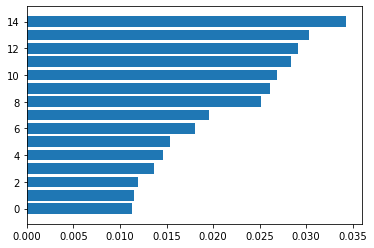

In [306]:
nbr_features = 15

tree_feature_importances = clf.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(X_train.feature_names)[sorted_idx])
plt.title("Random Forest Feature Importances (MDI)")
plt.show()

In [319]:
from sklearn.inspection import permutation_importance

In [ ]:
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

In [341]:
#I got no "frame"
sorted_idx = result.importances_mean.argsort()[-nbr_features:]

fig, ax = plt.subplots()
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(frame.feature_names)[sorted_idx])
plt.title("Permutation Importances (test set)")
plt.tight_layout()
plt.show()

NameError: name 'result' is not defined

In [321]:
import pydotplus
from sklearn import tree
from IPython.display import Image

In [322]:
#I got no "frame"
dot_data = tree.export_graphviz(clf.estimators_[1], out_file=None,  
                                feature_names=frame.feature_names, 
                                class_names=['stay', 'churn'],  
                                filled=True, rounded=True,  
                                special_characters=True, max_depth=4)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

NameError: name 'frame' is not defined

In [323]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=4, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9267051238547676
F1-score [0.99350046 0.90238612 0.92239072 0.93281402 0.87643312 0.91476091]
                    precision    recall  f1-score   support

            LAYING       0.99      1.00      0.99       537
           SITTING       0.97      0.85      0.90       491
          STANDING       0.88      0.97      0.92       532
           WALKING       0.90      0.97      0.93       496
WALKING_DOWNSTAIRS       0.94      0.82      0.88       420
  WALKING_UPSTAIRS       0.90      0.93      0.91       471

          accuracy                           0.93      2947
         macro avg       0.93      0.92      0.92      2947
      weighted avg       0.93      0.93      0.93      2947



In [324]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='log2', random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9375636240244316
F1-score [1.         0.92978723 0.9403255  0.93463415 0.89226869 0.9125    ]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.89      0.93       491
          STANDING       0.91      0.98      0.94       532
           WALKING       0.91      0.97      0.93       496
WALKING_DOWNSTAIRS       0.95      0.84      0.89       420
  WALKING_UPSTAIRS       0.90      0.93      0.91       471

          accuracy                           0.94      2947
         macro avg       0.94      0.93      0.93      2947
      weighted avg       0.94      0.94      0.94      2947



In [325]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=4, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='log2', random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.845945028842891
F1-score [0.99721448 0.69484808 0.82178988 0.85587189 0.78746594 0.86150491]
                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       537
           SITTING       0.99      0.54      0.69       491
          STANDING       0.70      0.99      0.82       532
           WALKING       0.77      0.97      0.86       496
WALKING_DOWNSTAIRS       0.92      0.69      0.79       420
  WALKING_UPSTAIRS       0.89      0.84      0.86       471

          accuracy                           0.85      2947
         macro avg       0.88      0.84      0.84      2947
      weighted avg       0.87      0.85      0.84      2947



## RandomForest with GridSearch

training the model..
Done....!

==> training time:- 0:14:28.167000

Predicting test data
Done....!

==> testing time:- 0:00:00.077000

==> Accuracy:- 0.9229725144214456


 ********Confusion Matrix********

 [[537   0   0   0   0   0]
 [  0 435  56   0   0   0]
 [  0  46 486   0   0   0]
 [  0   0   0 482   8   6]
 [  0   0   0  23 350  47]
 [  0   0   0  35   6 430]]


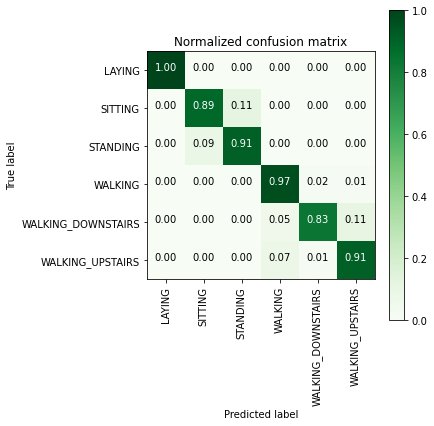

****************| Classifiction Report |****************
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.90      0.89      0.90       491
          STANDING       0.90      0.91      0.91       532
           WALKING       0.89      0.97      0.93       496
WALKING_DOWNSTAIRS       0.96      0.83      0.89       420
  WALKING_UPSTAIRS       0.89      0.91      0.90       471

          accuracy                           0.92      2947
         macro avg       0.92      0.92      0.92      2947
      weighted avg       0.92      0.92      0.92      2947



==> Best Estimator:
	RandomForestClassifier(max_depth=11, n_estimators=130)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 11, 'n_estimators': 130}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of best estimator : 0.92111451786697


In [368]:
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_grid_search_attributes(rfc_grid_results['model'])

### Tuning the hyper-parameters

In [326]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [327]:
param_list = {'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 5, 10, 20],
             }

grid_search = GridSearchCV(clf, param_grid=param_list, cv=5)
grid_search.fit(X_train, y_train)
clf = grid_search.best_estimator_

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.846284356973193
F1-score [0.99721448 0.69484808 0.82178988 0.85663402 0.78746594 0.8627451 ]
                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       537
           SITTING       0.99      0.54      0.69       491
          STANDING       0.70      0.99      0.82       532
           WALKING       0.77      0.97      0.86       496
WALKING_DOWNSTAIRS       0.92      0.69      0.79       420
  WALKING_UPSTAIRS       0.89      0.84      0.86       471

          accuracy                           0.85      2947
         macro avg       0.88      0.84      0.84      2947
      weighted avg       0.87      0.85      0.84      2947



In [328]:
param_list = {'max_depth': [None] + list(np.arange(2, 20)),
              'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
             }

random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=20, cv=5)
random_search.fit(X_train, y_train)
clf = random_search.best_estimator_


y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9222938581608415
F1-score [0.99814126 0.8992416  0.91882248 0.92087703 0.87628866 0.90200211]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.85      0.90       491
          STANDING       0.87      0.97      0.92       532
           WALKING       0.87      0.97      0.92       496
WALKING_DOWNSTAIRS       0.96      0.81      0.88       420
  WALKING_UPSTAIRS       0.90      0.91      0.90       471

          accuracy                           0.92      2947
         macro avg       0.93      0.92      0.92      2947
      weighted avg       0.93      0.92      0.92      2947



In [329]:
random_search.cv_results_['params'][random_search.cv_results_['rank_test_score'][0]]

{'min_samples_split': 50, 'min_samples_leaf': 20, 'max_depth': 16}

# Bagging

In [339]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

In [ ]:
#Done on Collab
clf = BaggingClassifier(base_estimator=None, n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

In [ ]:
#Done on Collab
clf = BaggingClassifier(base_estimator=SVC(C=1000), n_estimators=10, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

In [ ]:
#Done on Collab
clf = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=100), n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

## Bagging with GridSearch

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

# start Grid search
parameters = {'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]}
log_reg = BaggingClassifier(RandomForestClassifier(n_estimators=100),
                                     n_estimators = 100, max_features = 0.5)
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

# Boosting

In [330]:
from sklearn.ensemble import AdaBoostClassifier

In [332]:
clf = AdaBoostClassifier(base_estimator=None, n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5310485239226331
F1-score [1.         0.         0.68424437 0.52681891 0.         0.        ]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      1.00      0.68       532
           WALKING       0.36      1.00      0.53       496
WALKING_DOWNSTAIRS       0.00      0.00      0.00       420
  WALKING_UPSTAIRS       0.00      0.00      0.00       471

          accuracy                           0.53      2947
         macro avg       0.31      0.50      0.37      2947
      weighted avg       0.34      0.53      0.39      2947



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [338]:
clf = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=100),n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
                        
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9267051238547676
F1-score [1.         0.89641026 0.90569561 0.93358999 0.90747782 0.90697674]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.90      0.89      0.90       491
          STANDING       0.90      0.91      0.91       532
           WALKING       0.89      0.98      0.93       496
WALKING_DOWNSTAIRS       0.97      0.85      0.91       420
  WALKING_UPSTAIRS       0.90      0.91      0.91       471

          accuracy                           0.93      2947
         macro avg       0.93      0.92      0.93      2947
      weighted avg       0.93      0.93      0.93      2947



# Gradient Boosting

In [468]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#Done on Collab
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [ ]:
#Done on Collab
clf = HistGradientBoostingClassifier(learning_rate=1.0, max_depth=3, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

## Gradient Boosting with Grid Search

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

# Let's define the parameters to be tuned

parameters = {'n_estimators': np.arange(120,150,10), 'max_depth':np.arange(3,7,1)}

# Let's initiate the model

gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=parameters, n_jobs=-1)
gbdt_grid_results = perform_model(gbdt_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# Printing the best attributes of the model 

print_grid_search_attributes(gbdt_grid_results['model'])

training the model..


# XGBoost

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
#Done on Collab
clf = XGBClassifier(objective='binary:logistic', 
                    max_depth = 6,
                    learning_rate = 1.0,
                    gamma = 0.0,
                    tree_method='exact', # 'approx'
                    use_label_encoder=False,
                    random_state=42
                   )
clf.fit(X_train, new_y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(new_y_test, y_pred))
print('F1-score %s' % f1_score(new_y_test, y_pred, average=None))
print(classification_report(new_y_test, y_pred))

# LightGBM

In [224]:
!pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
#Done on Collab
clf = LGBMClassifier(boosting_type='gbdt',  #'goss', #'dart'
                     max_depth=-1, # no limit
                     num_leaves=31,
                     n_estimators=100,
                     subsample_for_bin=200000,
                     objective='binary',
                     reg_alpha=0.0, #L1 regularization term on weights
                     reg_lambda=0.0, #L2 regularization term on weights
                     random_state=42
                   )
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# Comparing some classifier

In [370]:
# ***************************** Print Accuracy and Error ******************************

print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 95.42%       4.581%
Linear SVC          : 96.27%       3.733% 
rbf SVM classifier  : 93.18%      6.82% 
Random Forest       : 92.3%      7.703% 
